Plot dataset stuff

In [1]:
import math

import matplotlib.pyplot as plt
import matplotlib as mpl

from helpers.data.file_hand import load_file_agg_raw_signal
from helpers.data.dset.constants import Names_Levels, Trials_Splits, Names_Labels, Names_Variables
from helpers.plot.util import  add_plot_note

path_dir_data = "../../state/new_physics/data/processed"

In [2]:
dfs = {
    level : load_file_agg_raw_signal(
        dir=path_dir_data,
        level=level,
        trials=Trials_Splits().train,
    ) for level in (
        Names_Levels().generator, 
        Names_Levels().detector,
    )
}

Opened ..\..\state\new_physics\data\processed\agg_sig_1_to_20_gen.pkl
Loaded aggregated raw signal data file: ..\..\state\new_physics\data\processed\agg_sig_1_to_20_gen.pkl
Opened ..\..\state\new_physics\data\processed\agg_sig_1_to_20_det.pkl
Loaded aggregated raw signal data file: ..\..\state\new_physics\data\processed\agg_sig_1_to_20_det.pkl


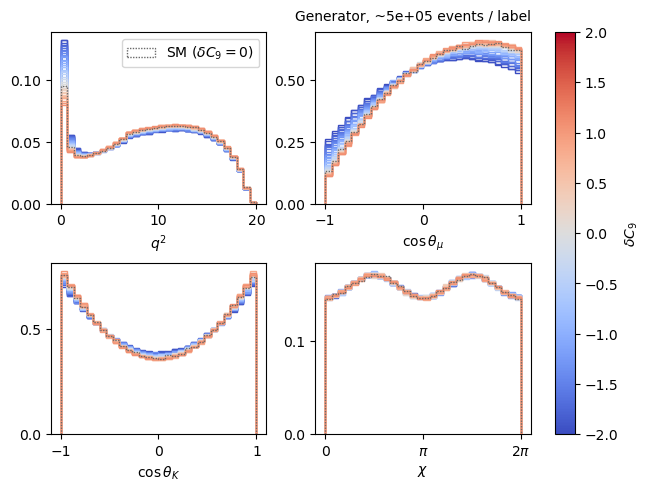

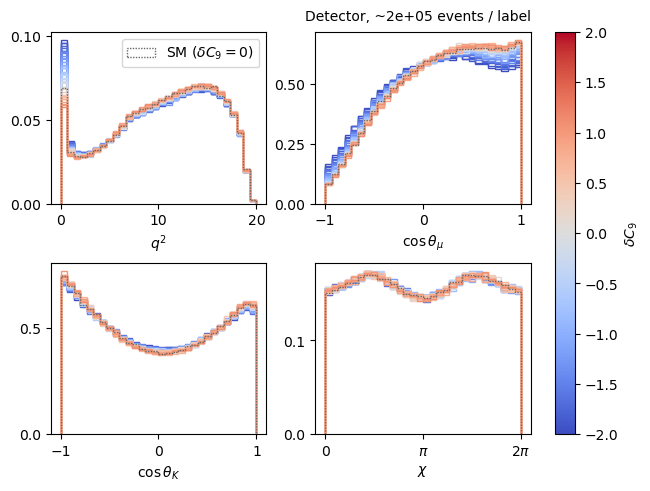

In [3]:
levels = (
    Names_Levels().generator, 
    Names_Levels().detector
)

nums_events = {
    level : f"{len(dfs[level])/44 :.0e}"
    for level in levels
}

notes = {
    Names_Levels().generator : f"Generator, ~{nums_events[Names_Levels().generator]} events / label",
    Names_Levels().detector : f"Detector, ~{nums_events[Names_Levels().detector]} events / label",
}

cmap = plt.cm.coolwarm
norm = mpl.colors.CenteredNorm(
    vcenter=0, 
    halfrange=abs(
        dfs
        [Names_Levels().generator]
        [Names_Labels().unbinned]
        .min()
    )
)

xlabels = {
    Names_Variables().q_squared : r"$q^2$",
    Names_Variables().cos_theta_mu : r"$\cos\theta_\mu$",
    Names_Variables().cos_k : r"$\cos\theta_K$",
    Names_Variables().chi : r"$\chi$"
}

xlims = {
    Names_Variables().q_squared : (0, 20),
    Names_Variables().cos_theta_mu : (-1, 1),
    Names_Variables().cos_k : (-1, 1),
    Names_Variables().chi : (0, 2*math.pi),
}

for level in levels:

    fig, axs = plt.subplots(
        2, 2, 
        sharey=False, 
        layout="compressed"
    )

    for variable, ax in zip(Names_Variables().tuple_, axs.flat):

        for label, df in dfs[level].groupby(
            Names_Labels().unbinned,    
        ):
            
            is_standard_model = (label == 0)
            
            color = (
                cmap(norm(label))
                if not is_standard_model
                else "dimgrey"
            )

            linestyle = (
                None
                if not is_standard_model
                else (0, (1, 1))
            )

            label_legend = (
                None
                if not is_standard_model
                else r"SM ($\delta C_9 = 0$)"
            )

            zorder = (
                None
                if not is_standard_model
                else 10
            )

            ax.hist(
                df[variable], 
                range=xlims[variable],
                histtype="step",
                density=True, 
                bins=30, 
                color=color,
                linestyle=linestyle,
                label=label_legend,
                zorder=zorder,
            )
        
        ax.set_xlabel(
            xlabels[variable]
        )

        ax.locator_params(axis='both', tight=True, nbins=3)

        if variable == Names_Variables().chi:
            ax.set_xticks(
                [0, math.pi, 2*math.pi], 
                ["0", r"$\pi$", r"$2 \pi$"],
            )

    add_plot_note(axs[0,1], notes[level])
    axs[0,0].legend()
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation='vertical', label=r'$\delta C_9$')

    plt.show()
